赌场的老虎机有一个绰号叫单臂强盗（single-armed bandit），因为它即使只有一只胳膊，也会把你的钱拿走。而多臂老虎机（或多臂强盗）就从这个绰号引申而来。假设你进入一个赌场，面对一排老虎机（所以有多个臂），由于不同老虎机的期望收益和期望损失不同，你采取什么老虎机选择策略来保证你的总收益最高呢？这就是经典的多臂老虎机问题[[1](#r1)]。

Exploitation & Explorations算法：

- Exploitation：基于已知最好策略，开发利用已知具有较高回报的item（贪婪、短期回报）
    - Advantage：充分利用已知高回报item
    - Disadvantage：陷于局部最优，错过潜在更高回报item的机会
    
- Exploration：不考虑曾经的经验，勘探潜在可能高回报的item（非贪婪、长期回报）
    - Advantage：发现更好回报的item
    - Disadvantage：充分利用已有高回报item机会减少（如已经找到最好item）

要找到Exploitation & Exploration的trade-off，以达到累计回报最大化。


In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Epsilon-Greedy

算法：
- 选一个 (0,1) 之间较小的数作为 epsilon
- 每次以概率 epsilon 做一件事：所有臂中随机选一个
- 每次以概率 1-epsilon 选择截止到当前，平均收益最大的那个臂。

优点：
- 能够应对变化：如果单个bandit的回报发生变化，能及时改变策略，避免卡在次优状态
- 可以控制对Exploration和Exploitation的偏好程度：
    - ε大，更大的灵活性（能更快的探索潜在可能高回报bandit，适应变化，收敛速度更快）
    - ε小，更好的稳定性（更多的机会用来开发利用当前最好回报的bandit），收敛速度变慢

缺点：
- 设置最好的ε比较困难。大则适应变化较快，但长期累积回报低，小则适应变好的能力不够，但能获取更好的长期回报。
- 策略运行一段时间后，仍然不做任何区分地随机exploration，会选择到明显较差的item。


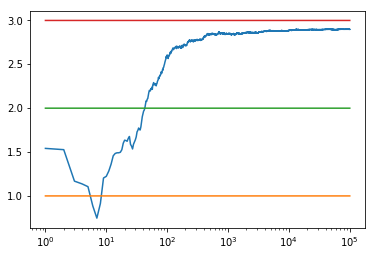

0.9917593909702143
1.981773510102057
3.000216210672249


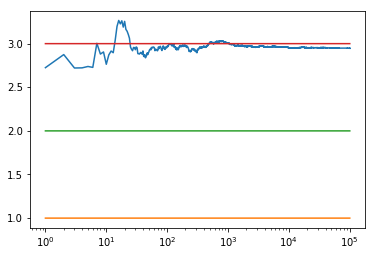

0.9929091141531082
1.9864760262156709
2.998547158358986


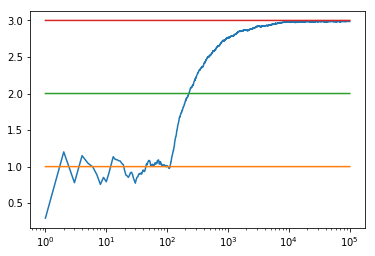

0.9469386528106242
1.914132108607982
2.9993490544150387


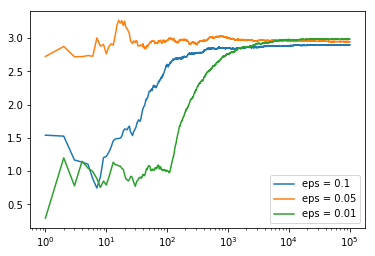

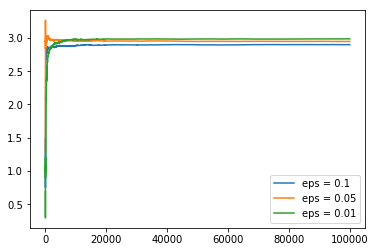

## Optimistic Initial Values

In [6]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps


class Bandit:
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 1

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def run_experiment(m1, m2, m3, N, upper_limit=10):
    bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

    data = np.empty(N)
    
    for i in range(N):
        # optimistic initial values
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average

if __name__ == '__main__':
    c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
    oiv = run_experiment(1.0, 2.0, 3.0, 100000)

    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.show()



ImportError: No module named 'comparing_epsilons'

## UCB(Upper Confidence Bound)

## Thompson sampling

- 假设每个臂是否产生收益，其背后有一个概率分布，产生收益的概率为 p。
- 不断地试验，去估计出一个置信度较高的 “概率 p 的概率分布” 就能近似解决这个问题了。
- 怎么能估计 “概率 p 的概率分布” 呢？ 答案是假设概率 p 的概率分布符合 beta(wins, lose)分布，它有两个参数: wins, lose。
- 每个臂都维护一个 beta 分布的参数。每次试验后，选中一个臂，摇一下，有收益则该臂的 wins 增加 1，否则该臂的 lose 增加 1。
- 每次选择臂的方式是：用每个臂现有的 beta 分布产生一个随机数 b，选择所有臂产生的随机数中最大的那个臂去摇。

## Softmax

# Reference

<span id = "r1"> 1. [求通俗解释下bandit老虎机到底是个什么东西？](https://www.zhihu.com/question/53381093/answer/245802834) </span>

<span id = "r2"> 2. [lazyprogrammer/machine_learning_examples](https://github.com/lazyprogrammer/machine_learning_examples/tree/master/rl)</span> 本文中很多代码的灵感代码来自这里。

<span id = "r3"> 3. [推荐系统的EE问题及Bandit算法](http://x-algo.cn/index.php/2016/12/15/ee-problem-and-bandit-algorithm-for-recommender-systems/)</span>